## EDA : Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## About dataset
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.
______________________________________________________________

Importing required modules for data manipulation and visiualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading Black Friday Sales dataset

In [2]:
bfs = pd.read_csv("C:/Data/Study/Ai_adventures/Projects/02 Black Friday Sales_EDA/train.csv")
bfs.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


### DATA PREPROCESSING 

#### - Information about dataset

In [3]:
bfs.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


This means that the columns Product_Category_2,Product_Category_3 contain 173638,383247 null values respectively  

#### - Renaming columns

In [5]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
bfs.rename(columns={"City_Category":"City",
                   "Stay_In_Current_City_Years":"Duration",
                   "Marital_Status":"Married",
                   "Product_Category_1":"Product 1",
                   "Product_Category_2":"Product 2",
                   "Product_Category_3":"Product 3"},inplace=True)
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City',
       'Duration', 'Married', 'Product 1', 'Product 2', 'Product 3',
       'Purchase'],
      dtype='object')

#### - Checking for duplicate records

In [7]:
bfs.duplicated().value_counts()

False    550068
dtype: int64

This infers that there are no duplicate records in the dataset

#### - Individual column processing 

In [8]:
bfs.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Gender column consists of only two values "M" and "F" and do not have any null values, which is the required format so we do not need to make any changes

In [9]:
bfs.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Here we will convert the range of age to categories;

0-25 : Adult

26-50 : Middle-aged

51+ : Old-aged

In [10]:
bfs.replace({"Age":{
    "0-17":"Adult","18-25":"Adult",
    "26-35":"Middle-aged","36-45":"Middle-aged","46-50":"Middle-aged",
    "51-55":"Old-aged","55+":"Old-aged"}},inplace=True)
bfs.Age.value_counts()

Middle-aged    375301
Adult          114762
Old-aged        60005
Name: Age, dtype: int64

Here we have successfully classified the age groups in three categories

In [11]:
bfs.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City,Duration,Married,Product 1,Product 2,Product 3,Purchase
0,1000001,P00069042,F,Adult,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Adult,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Adult,10,A,2,0,12,NaN,NaN,1422


#### - Processing null values

Only columns Product_Category_2, Product_Category_3 contain null values , so we will replace null values with 0, assuming 0 stands for Unknown category 

In [32]:
a1,b1=[(bfs[bfs.loc[:,"City"]=="A"]).groupby("Product 2")["Product 2"].count().idxmax(),(bfs[bfs.loc[:,"City"]=="A"]).groupby("Product 3")["Product 3"].count().idxmax()]
a1,b1

(8.0, 16.0)

In [33]:
a2,b2=[(bfs[bfs.loc[:,"City"]=="B"]).groupby("Product 2")["Product 2"].count().idxmax(),(bfs[bfs.loc[:,"City"]=="B"]).groupby("Product 3")["Product 3"].count().idxmax()]
a2,b2

(8.0, 16.0)

In [34]:
a3,b3=[(bfs[bfs.loc[:,"City"]=="C"]).groupby("Product 2")["Product 2"].count().idxmax(),(bfs[bfs.loc[:,"City"]=="C"]).groupby("Product 3")["Product 3"].count().idxmax()]
a3,b3

(8.0, 16.0)

In city A,B,C product 2 of category 8 and product 3 of category 16 is purchased maximum number of times , so we will fill all the null values according according to this criteria

<AxesSubplot:xlabel='City'>

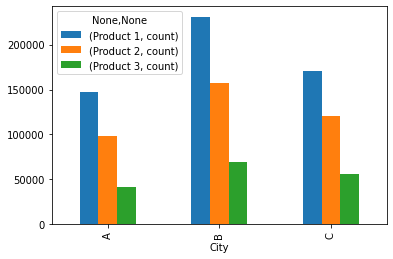

In [18]:
bfs.loc[:,['City',"Product 1","Product 2","Product 3"]].groupby("City")[["Product 1","Product 2","Product 3"]].agg(["count"]).plot(kind="bar")

Inferences;
- Purchase of Product 1 is maximum in all 3 cities
- Product 1 is purchased maximum number of times from customers of city B followed by city C and at the last city  A
- Product 2 is purchased maximum number of times from customers of city B followed by city C and at the last city  A
- Product 3 is purchased maximum number of times from customers of city B followed by city C and at the last city  A

In [35]:
bfs.loc[(bfs.loc[:,"City"]=="A") & (bfs["Product 2"].isnull()),"Product 2"]=a1
bfs.loc[(bfs.loc[:,"City"]=="A") & (bfs["Product 3"].isnull()),"Product 3"]=b1
bfs.loc[(bfs.loc[:,"City"]=="B") & (bfs["Product 2"].isnull()),"Product 2"]=a2
bfs.loc[(bfs.loc[:,"City"]=="B") & (bfs["Product 3"].isnull()),"Product 3"]=b2
bfs.loc[(bfs.loc[:,"City"]=="C") & (bfs["Product 2"].isnull()),"Product 2"]=a3
bfs.loc[(bfs.loc[:,"City"]=="C") & (bfs["Product 3"].isnull()),"Product 3"]=b3

In [36]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   User_ID     550068 non-null  int64  
 1   Product_ID  550068 non-null  object 
 2   Gender      550068 non-null  object 
 3   Age         550068 non-null  object 
 4   Occupation  550068 non-null  int64  
 5   City        550068 non-null  object 
 6   Duration    550068 non-null  object 
 7   Married     550068 non-null  int64  
 8   Product 1   550068 non-null  int64  
 9   Product 2   550068 non-null  float64
 10  Product 3   550068 non-null  float64
 11  Purchase    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Here we have successfully handled all the null values

### DATA VISUALISATION

In [22]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Duration,Married,Product 1,Product 2,Product 3,Purchase
0,1000001,P00069042,F,Adult,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,Adult,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Adult,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,Adult,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,Old-aged,16,C,4+,0,8,8.0,16.0,7969


<AxesSubplot:>

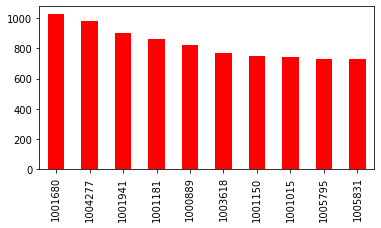

In [23]:
d = bfs.User_ID.value_counts().nlargest(10)
d.plot(kind="bar",color="red",figsize=(6,3))

Inferences;
- Here we can infer that customer with ID 1001680 is most active in online purchasing followed by customer with ID 1004277

<AxesSubplot:>

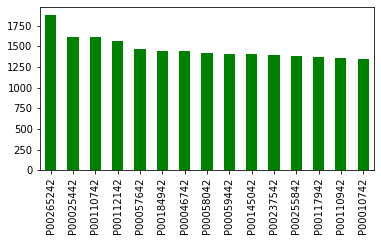

In [24]:
d = bfs.Product_ID.value_counts().nlargest(15)
d.plot(kind="bar",color="green",figsize=(6,3))

Inferences;
- Here we can infer that product with ID P00265242 is purchased most number of times followed by product with ID P00025442 and P00112142

<AxesSubplot:xlabel='Age', ylabel='count'>

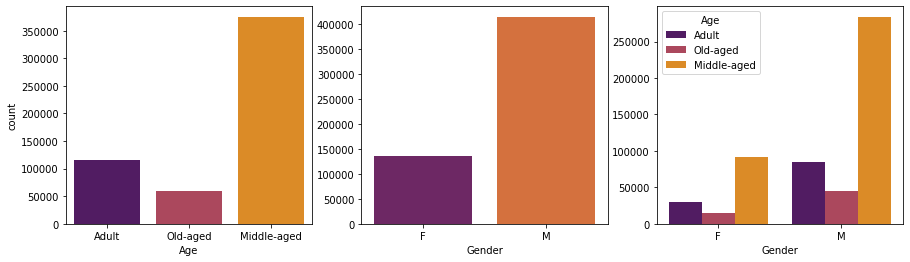

In [25]:
plt.figure(figsize=(15,4))
sns.countplot(x="Gender",data=bfs,hue="Age",palette="inferno",ax=plt.subplot(1,3,3))
sns.countplot(x="Gender",data=bfs,palette="inferno",ax=plt.subplot(1,3,2))
sns.countplot(x="Age",data=bfs,palette="inferno",ax=plt.subplot(1,3,1))

Inferences;
- Middle-aged people are most active members in online shopping 
- Male population is more active in online shopping
- Contrary to second inference it can be observed that Middle-aged female are more active as compared to old-aged and adult males


<AxesSubplot:xlabel='City', ylabel='count'>

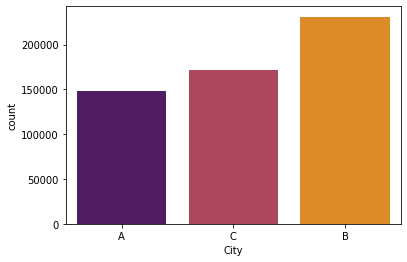

In [26]:
sns.countplot(x="City",data=bfs,palette="inferno")

Inferences;
- Most purchases are done by City B,followed by City C and at the last city A

<AxesSubplot:xlabel='City', ylabel='count'>

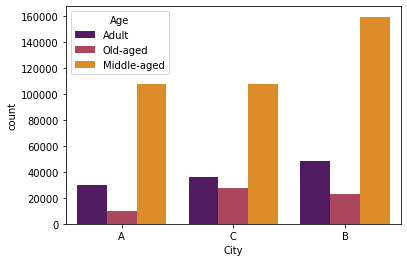

In [27]:
sns.countplot(x="City",data=bfs,hue="Age",palette="inferno")

Inferences;
- City A consists least number of Old aged people shopping online 
- City A and city C consists equal number of Middle-aged people doing online shopping 
- City C consists of the maximum number of Old-aged people doing online shopping followed by city B

<AxesSubplot:title={'center':'Purchase'}>

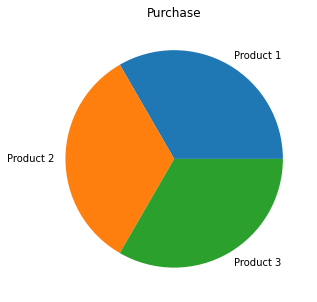

In [28]:
d = (bfs.loc[:,'Product 1':'Product 3']!=0).sum()
d.plot.pie(label="",title="Purchase",figsize=(5,5))

inferences;
- Product 1 is purchased maximum number of times followed by product 2 and at the last Product 2

<AxesSubplot:xlabel='Product 3', ylabel='Purchase'>

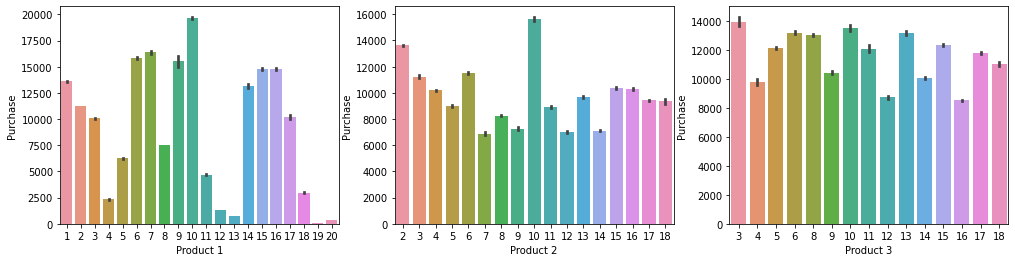

In [29]:
plt.figure(figsize=(17,4))
d = bfs.loc[:,"Product 1":"Purchase"].astype(int)
sns.barplot(x="Product 1",y="Purchase",data=d,ax=plt.subplot(1,3,1))
sns.barplot(x="Product 2",y="Purchase",data=d,ax=plt.subplot(1,3,2))
sns.barplot(x="Product 3",y="Purchase",data=d,ax=plt.subplot(1,3,3))

Inferences;
- Product 1 of category 10 is purchased most number of times followed by category 7 then 6
- Product 2 of category 10 is purchased most number of times followed by category 2 then 6
- Product 3 of category 3 is purchased most number of times followed by category 10 then 13

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

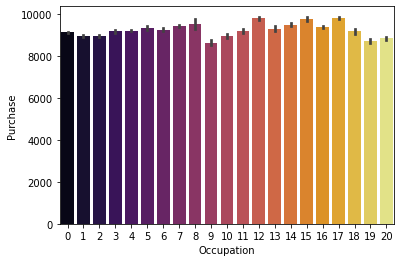

In [30]:
sns.barplot(x="Occupation",y="Purchase",data=bfs,palette="inferno")

Inferences;
- Purchase rate of customers from occupation 12,15,17 is the highest